In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


# Luxury Score

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

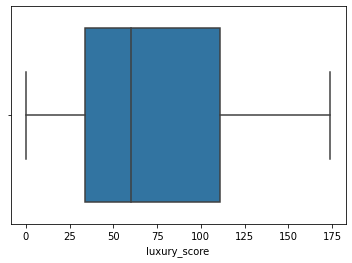

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0<=score<50:
        return "Low"
    elif 50<=score<150:
        return "Medium"
    elif 150<=score<175:
        return "High"
    else:
        None

In [10]:
train_df['luxury_category']=train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High


In [12]:
def categorize_floor(floor):
    if 0<=floor<=2:
        return "Low Floor"
    elif 3<=floor<=10:
        return "Mid Floor"
    elif 11<=floor<51:
        return "High Floor"
    else:
        None

In [13]:
train_df['floor_category']=train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,High,Mid Floor


In [17]:
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded = train_df.copy()
categorical_cols = train_df.select_dtypes(include=['object']).columns


Index(['property_type', 'sector', 'balcony', 'agePossession',
       'luxury_category', 'floor_category'],
      dtype='object')

In [18]:
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [19]:
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

In [20]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


# Technique 1 - Correlation Analysis

<AxesSubplot:>

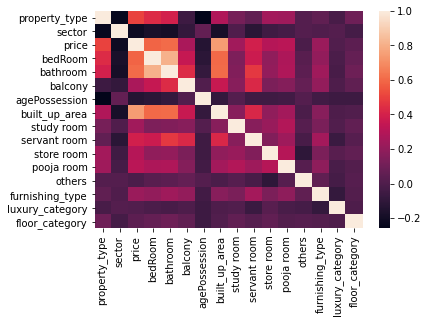

In [22]:
sns.heatmap(data_label_encoded.corr())

In [30]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coef'})
fi_df1

,feature,corr_coef
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


# Technique 2 - Random Forest Feature Importance

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label,y_label)

fi_df2 = pd.DataFrame({
    'feature':X_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values('rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.650500
1,sector,0.102572
0,property_type,0.100071
3,bathroom,0.025999
2,bedRoom,0.023741
8,servant room,0.019383
5,agePossession,0.014889
4,balcony,0.012784
12,furnishing_type,0.010485
9,store room,0.008239


# Technique 3 - Gradient Boosting Feature Importance

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor()
gb_label.fit(X_label,y_label)

fi_df3 = pd.DataFrame({
    'feature':X_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values('rf_importance', ascending=False)

fi_df3

,feature,rf_importance
6,built_up_area,0.650500
1,sector,0.102572
0,property_type,0.100071
3,bathroom,0.025999
2,bedRoom,0.023741
8,servant room,0.019383
5,agePossession,0.014889
4,balcony,0.012784
12,furnishing_type,0.010485
9,store room,0.008239


# Technique 4 - Permutation Importance

In [35]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label,X_test_label,y_train_label,y_test_label = train_test_split(X_label,y_label,test_size=0.2,random_state=42)
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label,y_train_label)
perm_importance = permutation_importance(rf_label,X_test_label,y_test_label,n_repeats=30,random_state=42)
fi_df4 = pd.DataFrame({
    'feature':X_label.columns,
    'perm_importance':perm_importance.importances_mean
}).sort_values('perm_importance', ascending=False)

fi_df4

,feature,perm_importance
6,built_up_area,0.736095
0,property_type,0.200612
1,sector,0.178911
8,servant room,0.021020
3,bathroom,0.019903
2,bedRoom,0.018014
5,agePossession,0.004962
9,store room,0.002150
14,floor_category,0.000922
11,others,0.000791


# Technique 5 - LASSO

In [36]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

lasso = Lasso(alpha=0.01,random_state=42)
lasso.fit(X_scaled,y_label)
fi_df5 = pd.DataFrame({
    'feature':X_label.columns,
    'lasso_coef':lasso.coef_
}).sort_values('lasso_coef', ascending=False)

fi_df5

,feature,lasso_coef
6,built_up_area,1.510223
0,property_type,0.713784
3,bathroom,0.274990
9,store room,0.199629
7,study room,0.171824
12,furnishing_type,0.164119
8,servant room,0.160604
10,pooja room,0.073872
13,luxury_category,0.055267
2,bedRoom,0.014178


# Technique 6 - RFE (Recursive Feature Elemination)

In [40]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.647985
1,sector,0.102263
0,property_type,0.100858
2,bedRoom,0.028137
3,bathroom,0.023651
8,servant room,0.019557
5,agePossession,0.013776
4,balcony,0.012602
12,furnishing_type,0.010217
9,store room,0.009340


In [41]:
fi_df6

,feature,rfe_score
6,built_up_area,0.647985
1,sector,0.102263
0,property_type,0.100858
2,bedRoom,0.028137
3,bathroom,0.023651
8,servant room,0.019557
5,agePossession,0.013776
4,balcony,0.012602
12,furnishing_type,0.010217
9,store room,0.009340


# Technique 7 - Linear Regression Weights

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_scaled,y_label)
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

<IPython.core.display.Javascript object>

,feature,reg_coeffs
6,built_up_area,1.512668
0,property_type,0.712864
3,bathroom,0.281949
9,store room,0.204113
7,study room,0.180046
12,furnishing_type,0.173200
8,servant room,0.169610
10,pooja room,0.076934
13,luxury_category,0.066467
2,bedRoom,0.016801


# Technique 8 - SHAP

In [45]:
!pip install shap --user

  Using cached shap-0.42.1-cp38-cp38-win_amd64.whl (462 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.8.0rc0 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.8.0 which is incompatible.
sphinx 4.0.1 requires Jinja2<3.0,>=2.3, but you have jinja2 3.0.3 which is incompatible.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


In [47]:
# import shap

# # Compute SHAP values using the trained Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_label, y_label)

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_label)

# # Summing the absolute SHAP values across all samples to get an overall measure of feature importance
# shap_sum = np.abs(shap_values).mean(axis=0)

# shap_values
# fi_df8 = pd.DataFrame({
#     'feature': X_label.columns,
#     'SHAP_score': np.abs(shap_values).mean(axis=0)
# }).sort_values(by='SHAP_score', ascending=False)

# fi_df8

In [54]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [59]:
final_fi_df

,corr_coef,rf_importance_x,rf_importance_y,perm_importance,lasso_coef,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.062367,0.113978,0.113978,0.187679,-0.027937,0.113734,-0.031498
bedRoom,0.173878,0.026381,0.026381,0.018897,0.005689,0.031294,0.006730
bathroom,0.179314,0.028890,0.028890,0.020879,0.110337,0.026304,0.112933
balcony,0.079291,0.014205,0.014205,-0.000443,-0.017489,0.014016,-0.026585
agePossession,-0.039455,0.016545,0.016545,0.005205,-0.000000,0.015321,-0.000818
built_up_area,0.220130,0.722835,0.722835,0.772170,0.605962,0.720670,0.605892
study room,0.071445,0.009127,0.009127,-0.018906,0.068943,0.009980,0.072117
servant room,0.115253,0.021538,0.021538,0.022051,0.064441,0.021751,0.067936
store room,0.089889,0.009156,0.009156,0.002255,0.080099,0.010388,0.081757


In [60]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [62]:
final_fi_df[['rf_importance_x','rf_importance_y','perm_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.734627
sector             0.132343
bathroom           0.026240
bedRoom            0.025738
servant room       0.021719
agePossession      0.013404
balcony            0.010496
store room         0.007739
luxury_category    0.006250
furnishing_type    0.005919
floor_category     0.005623
pooja room         0.004975
others             0.002595
study room         0.002332
dtype: float64

In [63]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [64]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [65]:
scores.mean()

0.8198523860339749

In [66]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [67]:
scores.mean()

0.8197142128935336

In [68]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [69]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [70]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,1.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,1.0,0.0,1.0,0.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,1.0,0.0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,2.0,2.0,0.37
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,0.0,0.0,1.0,6.00
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,1.0,2.0,2.0,0.60
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,0.0,2.0,2.0,15.50
